In [2]:
import pandas as pd
file = pd.read_csv('insurance.csv')

print(file.info())
print(file.shape)

file.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data check and clean

In [3]:
file.duplicated().any()
file =file.drop_duplicates()

In [4]:
file.sample(5)

,age,sex,bmi,children,smoker,region,charges
994,27,female,20.045,3,yes,northwest,16420.49455
826,56,male,31.790,2,yes,southeast,43813.86610
506,22,male,31.350,1,no,northwest,2643.26850
1149,42,male,34.100,0,no,southwest,5979.73100
1263,43,female,29.900,1,no,southwest,7337.74800


In [5]:
file =file.drop_duplicates().reset_index()
file.shape

(1337, 8)

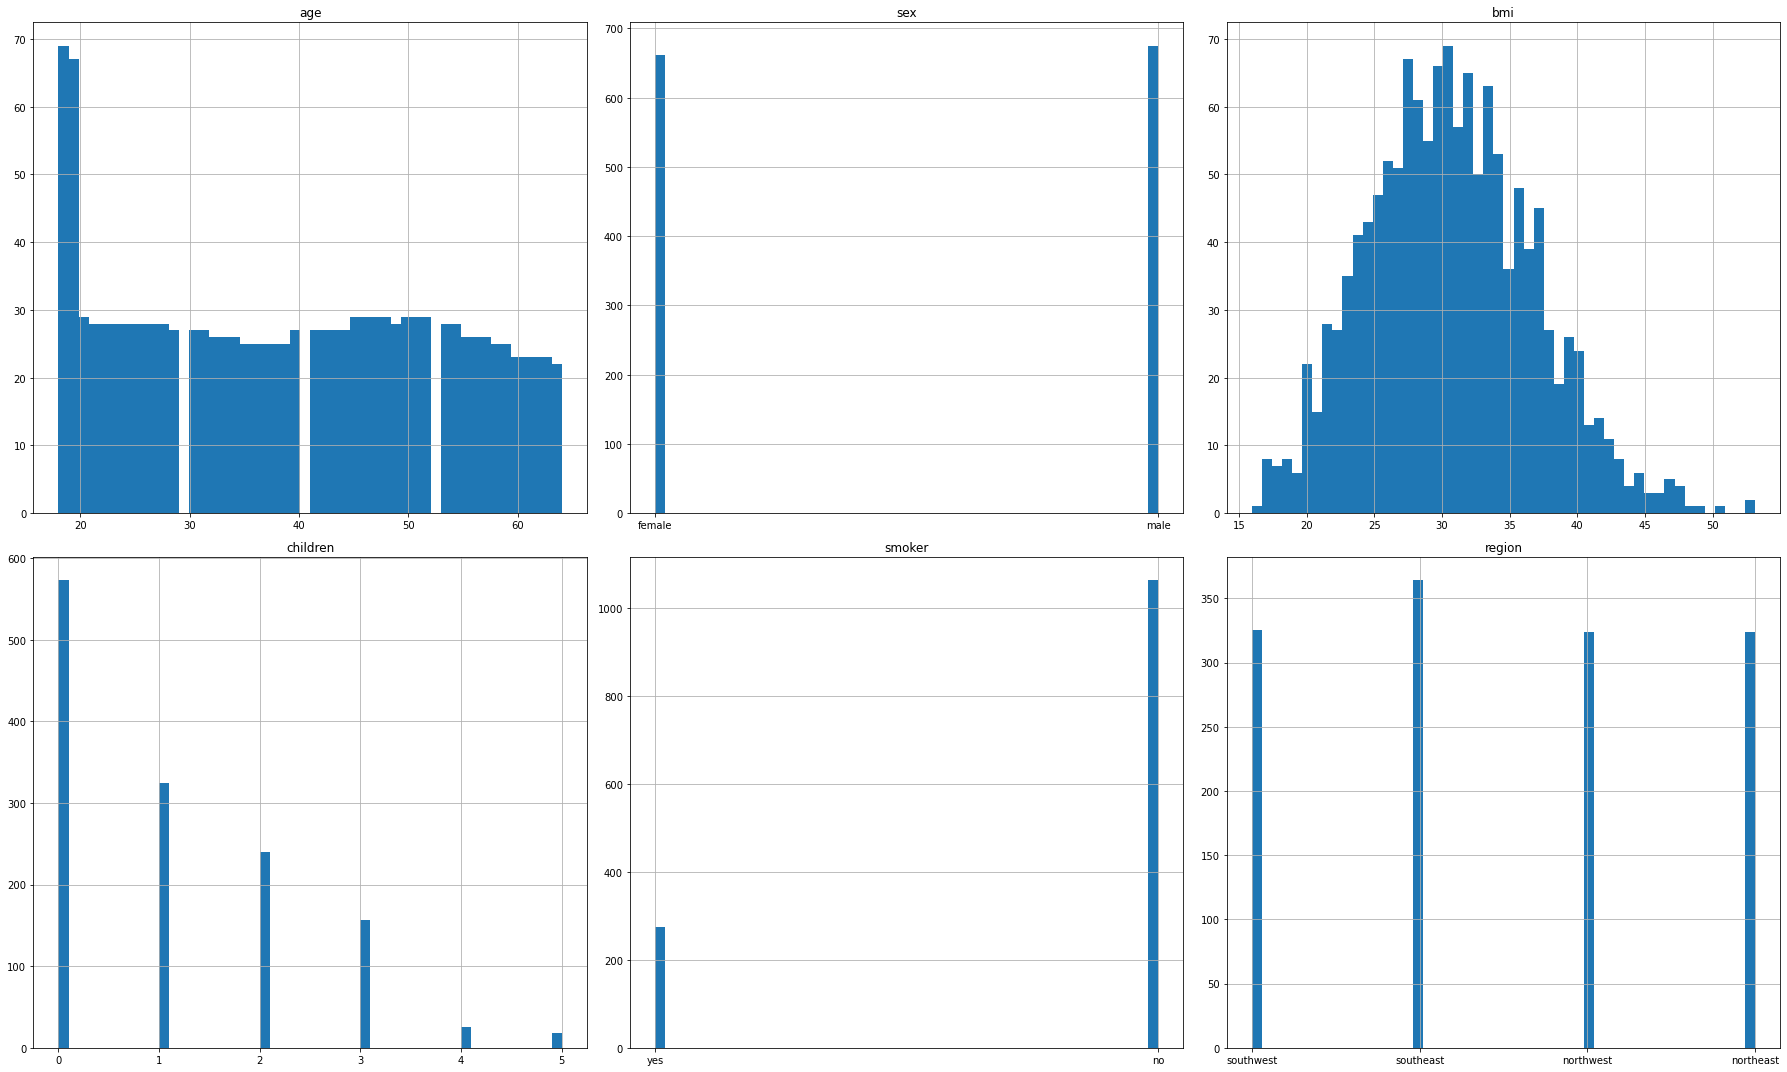

In [6]:
import matplotlib.pyplot as plt

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(25,15))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=50,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

draw_histograms(file, file.drop(columns=['index','charges'], axis=1), 2, 3)

In [7]:
file['user_ID'] = pd.DataFrame(file.index).astype(int)
file = file[['user_ID', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
file

,user_ID,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1332,50,male,30.970,3,no,northwest,10600.54830
1333,1333,18,female,31.920,0,no,northeast,2205.98080
1334,1334,18,female,36.850,0,no,southeast,1629.83350
1335,1335,21,female,25.800,0,no,southwest,2007.94500


In [8]:

file_dummies = pd.get_dummies(file[['sex', 'smoker', 'region']])
file_dummies['user_ID'] = file['user_ID']
file_dummies

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,user_ID
0,1,0,0,1,0,0,0,1,0
1,0,1,1,0,0,0,1,0,1
2,0,1,1,0,0,0,1,0,2
3,0,1,1,0,0,1,0,0,3
4,0,1,1,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...
1332,0,1,1,0,0,1,0,0,1332
1333,1,0,1,0,1,0,0,0,1333
1334,1,0,1,0,0,0,1,0,1334
1335,1,0,1,0,0,0,0,1,1335


In [9]:
file = pd.merge(file, file_dummies, on='user_ID')
file = file[['user_ID', 'age', 'sex_female', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'charges']]
file = file.sort_values(by='user_ID')
file = file[['age', 'sex_female', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'charges']]
file

,age,sex_female,sex_male,bmi,children,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,1,0,27.900,0,1,0,0,0,1,16884.92400
1,18,0,1,33.770,1,0,0,0,1,0,1725.55230
2,28,0,1,33.000,3,0,0,0,1,0,4449.46200
3,33,0,1,22.705,0,0,0,1,0,0,21984.47061
4,32,0,1,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...
1332,50,0,1,30.970,3,0,0,1,0,0,10600.54830
1333,18,1,0,31.920,0,0,1,0,0,0,2205.98080
1334,18,1,0,36.850,0,0,0,0,1,0,1629.83350
1335,21,1,0,25.800,0,0,0,0,0,1,2007.94500


# Correlation + Future engineering:

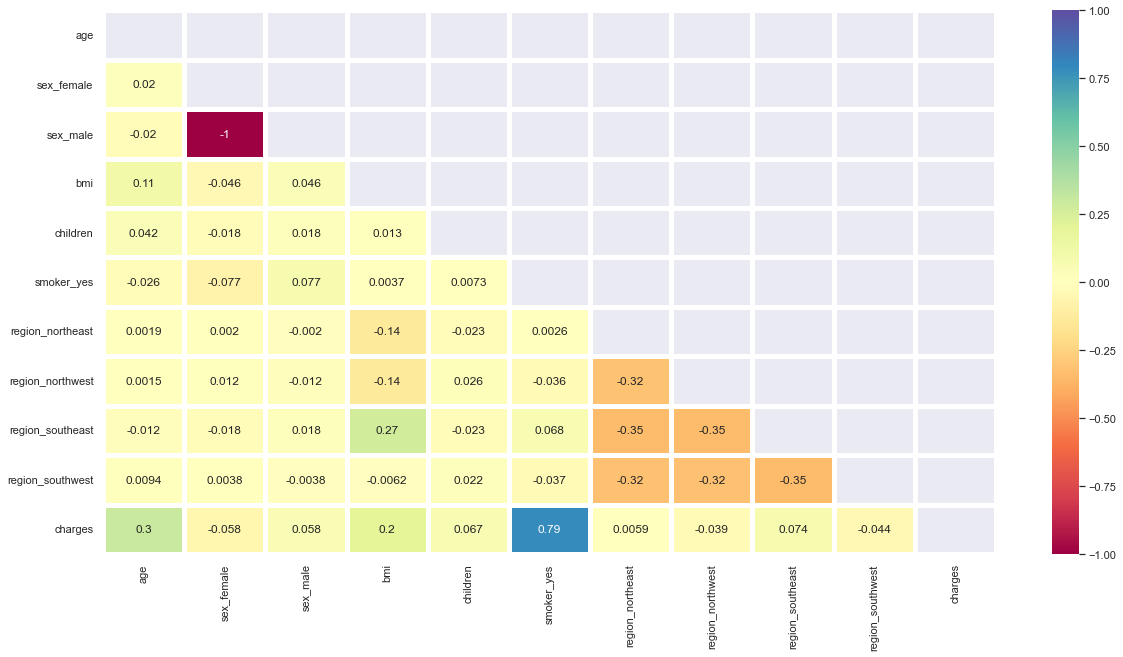

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
correlation_matrix = file.corr()
sns.set(rc={'figure.figsize':(20,10)}) 
mask = np.triu(np.ones_like(correlation_matrix), k=0) 
sns.heatmap(correlation_matrix, annot=True, cmap = 'Spectral', linewidths=5, mask=mask, vmax=1)
pass

In [11]:
def plot_boxes(x_df,y_df):
    boxes = len(y_df.unique())
    sns.set(rc={'figure.figsize':(20, boxes/1.5)}) 
    sns.boxplot(y=y_df, x=x_df, orient="h", fliersize=10);

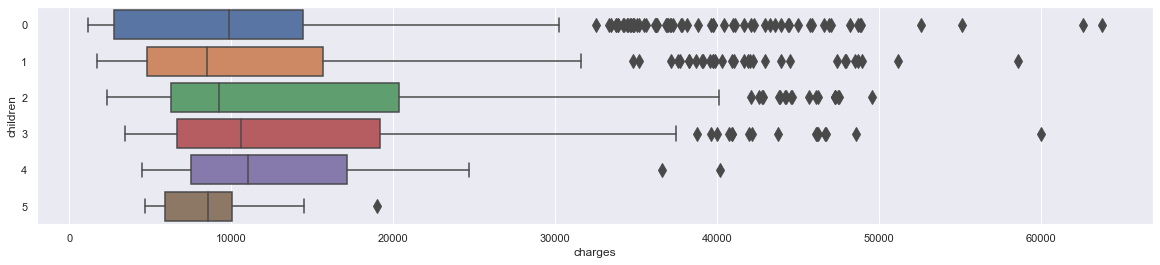

In [12]:
import seaborn as sns

plot_boxes(file["charges"], file["children"])

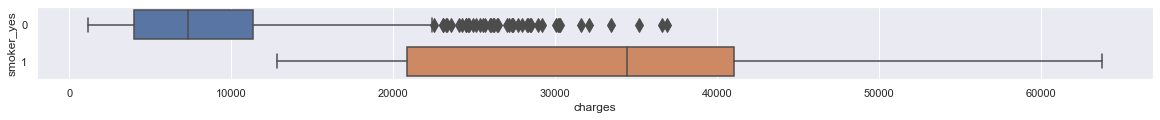

In [13]:
plot_boxes(file["charges"], file["smoker_yes"])

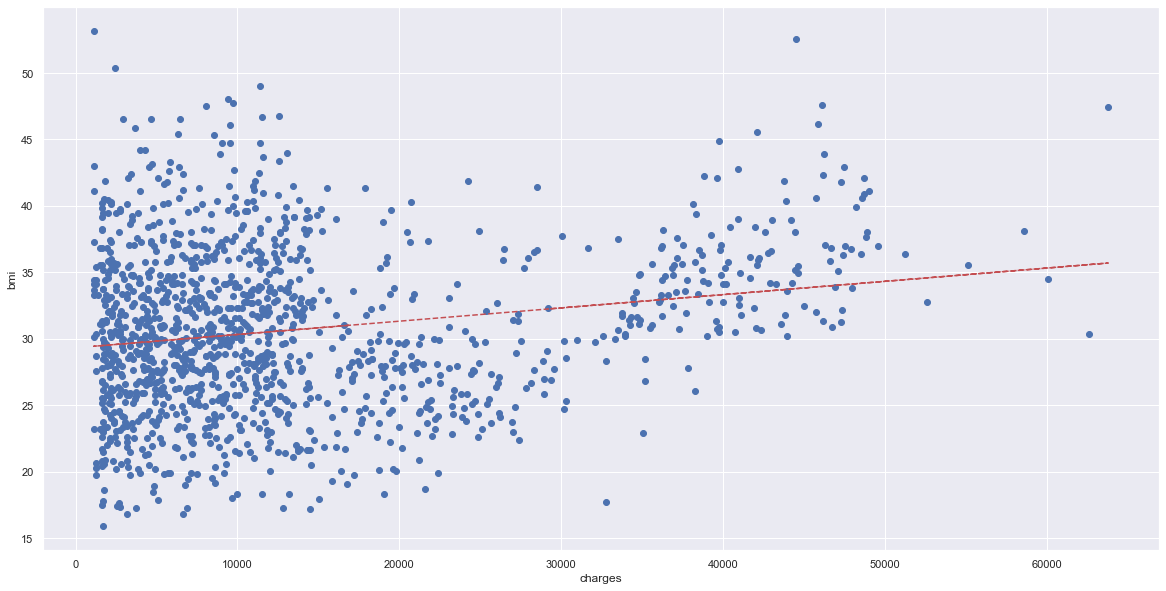

In [14]:
import numpy as np

sns.set(rc={'figure.figsize':(20,10)}) 
y = file["bmi"]
x = file["charges"]
plt.scatter(x, y)
plt.ylabel("bmi")
plt.xlabel("charges")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--");

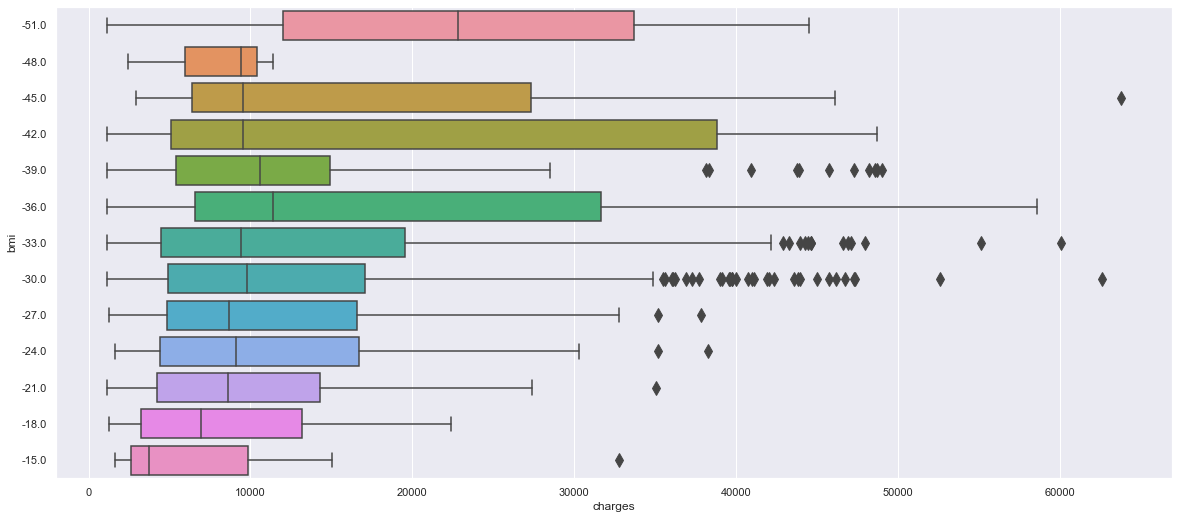

In [15]:
plot_boxes(file["charges"], -(file["bmi"]//3)*3)

## Base model - linear regression basic

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

X = file.drop(['charges'], axis=1)
y = file['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)

lnr = LinearRegression()

lnr.fit(X_train, y_train)

y_pred_lnr_b = lnr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_lnr_b , squared=False)
mae = mean_absolute_error(y_test, y_pred_lnr_b)
r2 = r2_score(y_test, y_pred_lnr_b)
print(f'mean_y_pred: {y_pred_lnr_b.mean()}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}')

mean_y_pred: 13106.770095124171, RMSE: 6240.205919905718, MAE: 4181.815956942293, R^2: 0.7724363518631283


# Feature creation

In [17]:
file = file.drop(columns=['sex_female', 'region_northwest'])
file

,age,sex_male,bmi,children,smoker_yes,region_northeast,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0,0,1,16884.92400
1,18,1,33.770,1,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,0,0,21984.47061
4,32,1,28.880,0,0,0,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,0,0,0,10600.54830
1333,18,0,31.920,0,0,1,0,0,2205.98080
1334,18,0,36.850,0,0,0,1,0,1629.83350
1335,21,0,25.800,0,0,0,0,1,2007.94500


1. poniżej 16 - wygłodzenie - cat 0
2. 16 - 16.99 - wychudzenie cat 1
3. 17 - 18.49 - niedowagę - cat 2
4. 18.5 - 24.99 - wagę prawidłową - cat 3
5. 25.0 - 29.9 - nadwagę - cat 4
6. 30.0 - 34.99 - I stopień otyłości - cat 5
7. 35.0 - 39.99 - II stopień otyłości - cat 6
8. powyżej 40.0 - otyłość skrajną - cat 7

In [18]:
# create a list of our conditions
conditions = [
    (file['bmi'] <= 16),
    (file['bmi'] < 17),
    (file['bmi'] < 18.50),
    (file['bmi'] < 25),
    (file['bmi'] < 30),
    (file['bmi'] < 35),
    (file['bmi'] < 40),
    (file['bmi'] >= 40),
    ]

# create a list of the values we want to assign for each condition
values = [0,1,2,3,4,5,6,7]

# create a new column and use np.select to assign values to it using our lists as arguments
file['bmi_cat'] = np.select(conditions, values)

# display updated DataFrame
file.head()

,age,sex_male,bmi,children,smoker_yes,region_northeast,region_southeast,region_southwest,charges,bmi_cat
0,19,0,27.900,0,1,0,0,1,16884.92400,4
1,18,1,33.770,1,0,0,1,0,1725.55230,5
2,28,1,33.000,3,0,0,1,0,4449.46200,5
3,33,1,22.705,0,0,0,0,0,21984.47061,3
4,32,1,28.880,0,0,0,0,0,3866.85520,4


In [19]:
skewed_charges = ['charges']

for feat in skewed_charges:
    file['{}_log'.format(feat)] = np.log10(file[feat].values)

file

,age,sex_male,bmi,children,smoker_yes,region_northeast,region_southeast,region_southwest,charges,bmi_cat,charges_log
0,19,0,27.900,0,1,0,0,1,16884.92400,4,4.227499
1,18,1,33.770,1,0,0,1,0,1725.55230,5,3.236928
2,28,1,33.000,3,0,0,1,0,4449.46200,5,3.648308
3,33,1,22.705,0,0,0,0,0,21984.47061,3,4.342116
4,32,1,28.880,0,0,0,0,0,3866.85520,4,3.587358
...,...,...,...,...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,0,0,0,10600.54830,5,4.025328
1333,18,0,31.920,0,0,1,0,0,2205.98080,5,3.343602
1334,18,0,36.850,0,0,0,1,0,1629.83350,6,3.212143
1335,21,0,25.800,0,0,0,0,1,2007.94500,4,3.302752


In [20]:


X = file.drop(columns=['charges_log', 'bmi_cat', 'charges'], axis=1)
y = file['charges_log']


X_train, X_test, y_train_l, y_test_l = train_test_split(X,y, train_size=0.7, random_state=42)


print(X_train.shape), print(y_train_l.shape)
print(X_test.shape), print(y_test_l.shape)
pass

(935, 8)
(935,)
(402, 8)
(402,)


# Linear regression model creation with charges log

In [23]:
lnr = LinearRegression()

lnr.fit(X_train, y_train_l)

y_pred_lnr_log = 10**lnr.predict(X_test)
rmse = mean_squared_error(10**y_test_l, y_pred_lnr_log , squared=False)
mae = mean_absolute_error(10**y_test_l, y_pred_lnr_log )
r2 = r2_score(10**y_test_l, y_pred_lnr_log )
print(f'mean_y_pred: {y_pred_lnr_log .mean()}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}')

mean_y_pred: 13056.743799045533, RMSE: 7254.922203283578, MAE: 3730.5552134244977, R^2: 0.69241116684553


Feature: 0, Score: 0.01482
Feature: 1, Score: 0.03246
Feature: 2, Score: 0.00597
Feature: 3, Score: 0.04098
Feature: 4, Score: 0.66978
Feature: 5, Score: 0.02162
Feature: 6, Score: 0.03420
Feature: 7, Score: 0.02442


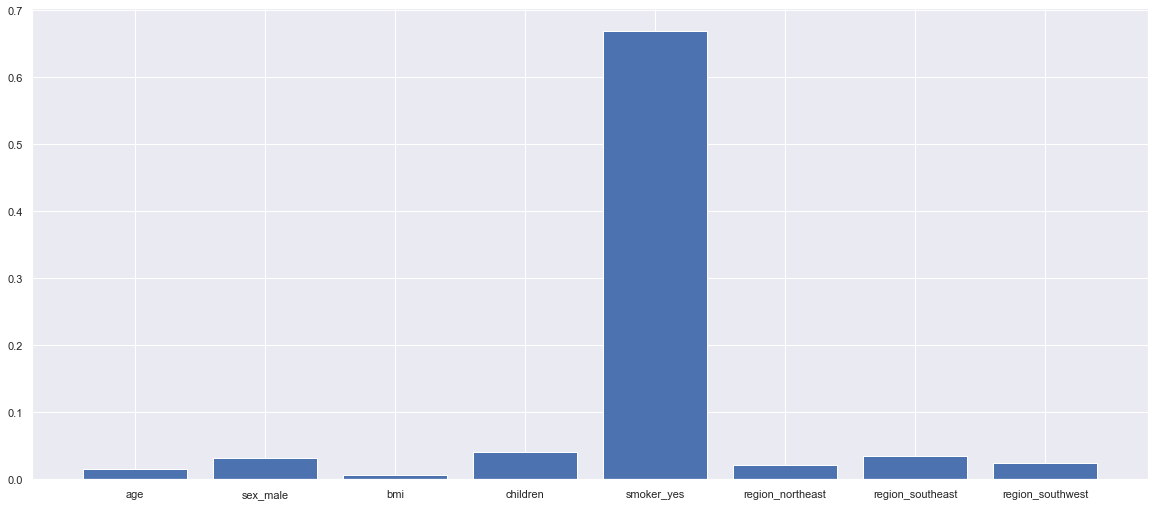

In [24]:
# linear regression feature importance
from matplotlib import pyplot

# get importance
importance = abs(lnr.coef_)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([column for column in X.columns], importance)
pyplot.show()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_regress_pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())
random_search = GridSearchCV(poly_regress_pipeline, {'polynomialfeatures__degree': range(1, 10)}, cv=5, verbose=1)
random_search.fit(X_train, y_train_l)
random_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'polynomialfeatures__degree': 3}

In [26]:

X_train, X_test, y_train_l, y_test_l = train_test_split(X,y, train_size=0.7, random_state=42)

best_model  = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(X_train, y_train_l)
y_ = 10**best_model.predict(X_test)

c:\Users\andrz\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


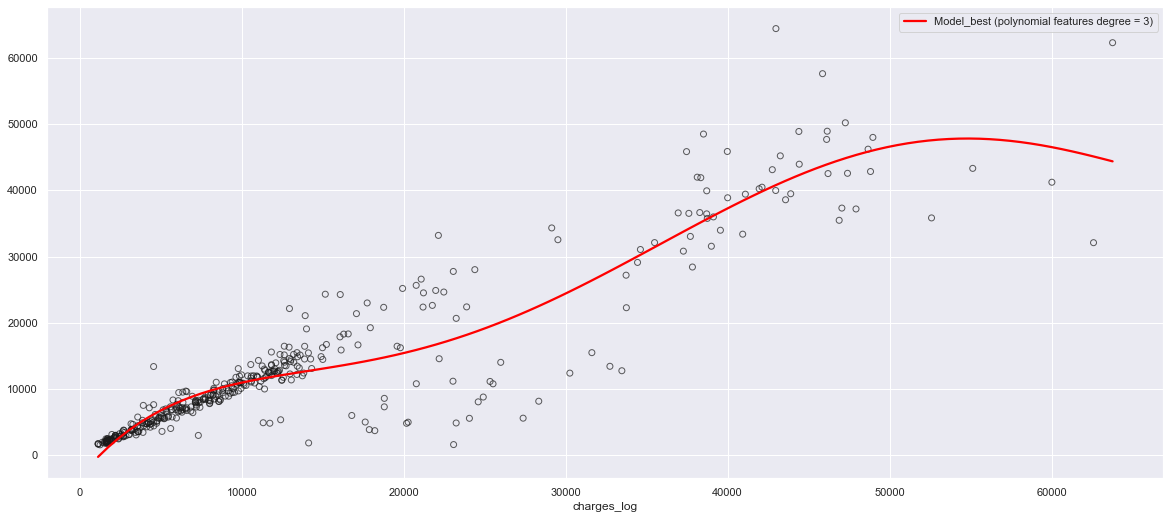

In [28]:
plt.scatter(10**y_test_l, y_, facecolors='None', edgecolors='k', alpha=.7) 
sns.regplot(10**y_test_l, y_, ci=None, label='Model_best (polynomial features degree = 3)', order=5, scatter=False, color='red')
plt.legend()

In [29]:

rmse = mean_squared_error(10**y_test_l, y_, squared=False)
mae = mean_absolute_error(10**y_test_l, y_)
r2 = r2_score(10**y_test_l, y_)
print(f'mean_y_pred: {y_.mean()}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}')

mean_y_pred: 13211.859915435629, RMSE: 5309.249996026348, MAE: 2777.3618336666505, R^2: 0.8352704940453499


# RandomForest

In [30]:
from sklearn.ensemble import RandomForestRegressor

y = file['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)
rf = RandomForestRegressor().fit(X_train, y_train)

In [31]:
rf.score(X_test, y_test)

0.862813972835743

In [32]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, MAE: {mae}, R^2: {r2}")

MSE: 23474958.555773295, MAE: 2621.781457960199, R^2: 0.862813972835743


In [33]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {"max_depth": list(range(2,11,1)),
              "max_features": list(range(6,11,2)),
              "ccp_alpha" : [0, 0.05, 0.1, 0.15],
              "n_estimators" : [100, 200, 500, 1000]
              }
grid_search = RandomizedSearchCV(rf, param_grid, random_state=42, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_;

c:\Users\andrz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\andrz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\andrz\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\andrz\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\andrz\Anaconda3\lib\site-packages\jo

In [34]:
rf_better = grid_search.best_estimator_
rf_better.fit(X_train, y_train)
rf_better.score(X_test,y_test)

0.874241211358824

In [35]:
rf_y_pred = rf_better.predict(X_test)

# DecissionTreeRegressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

data_tree = file.copy()
tree_reg = DecisionTreeRegressor(random_state=42, max_leaf_nodes=10) 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=42)

In [37]:
def pred_result(pred,y_test):
  score_MSE = round(mean_squared_error(pred, y_test))
  score_MAE = round(mean_absolute_error(pred, y_test))
  score_r2score = round(r2_score(pred, y_test),2)
  print(f"MSE: {score_MSE} | MAE: {score_MAE} | R2score: {score_r2score}")

In [38]:
tree_pred = tree_reg.predict(X_test)
pred_result(tree_pred, y_test)

MSE: 24078955 | MAE: 2952 | R2score: 0.83


In [39]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call
from sklearn.tree import plot_tree

[Text(0.5294117647058824, 0.9, 'smoker_yes <= 0.5\nsquared_error = 135790697.175\nsamples = 935\nvalue = 13035.066'),
 Text(0.29411764705882354, 0.7, 'age <= 42.5\nsquared_error = 36672582.209\nsamples = 741\nvalue = 8407.907'),
 Text(0.17647058823529413, 0.5, 'age <= 32.5\nsquared_error = 21477560.394\nsamples = 423\nvalue = 5393.762'),
 Text(0.11764705882352941, 0.3, 'children <= 1.5\nsquared_error = 24185611.376\nsamples = 272\nvalue = 4481.457'),
 Text(0.058823529411764705, 0.1, 'squared_error = 19526407.525\nsamples = 204\nvalue = 3775.004'),
 Text(0.17647058823529413, 0.1, 'squared_error = 32174303.102\nsamples = 68\nvalue = 6600.818'),
 Text(0.23529411764705882, 0.3, 'squared_error = 12399617.702\nsamples = 151\nvalue = 7037.119'),
 Text(0.4117647058823529, 0.5, 'age <= 58.5\nsquared_error = 28724824.323\nsamples = 318\nvalue = 12417.289'),
 Text(0.35294117647058826, 0.3, 'squared_error = 24776950.796\nsamples = 245\nvalue = 11496.597'),
 Text(0.47058823529411764, 0.3, 'children

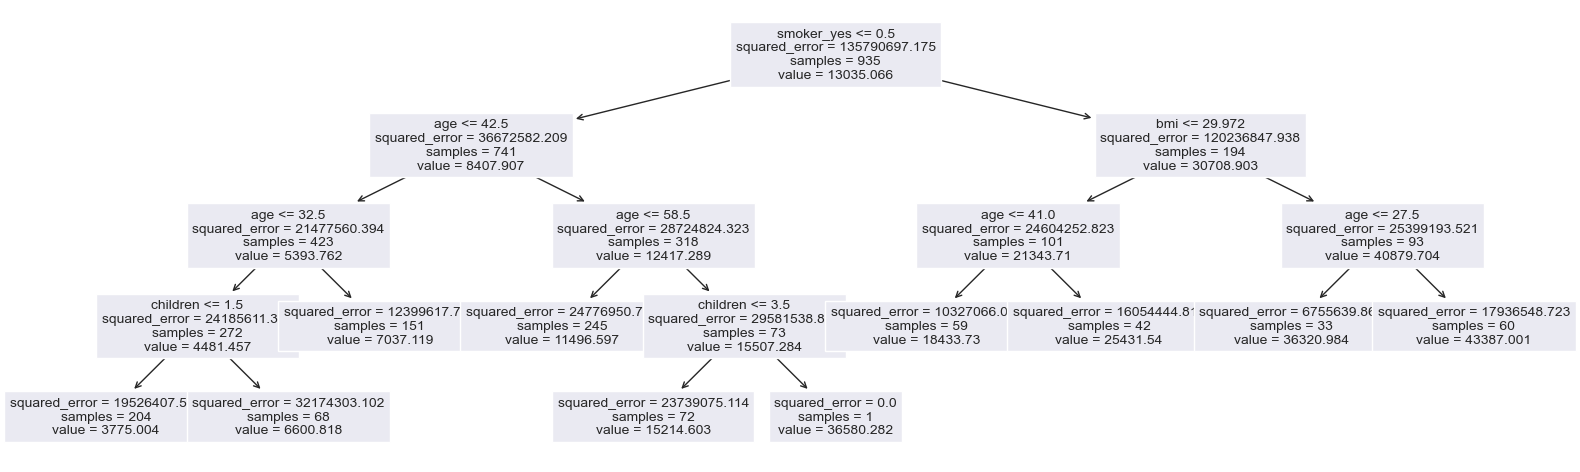

In [40]:
plt.figure(figsize=[20,6], dpi=100)
plot_tree(tree_reg, fontsize=10, feature_names=file.columns)

# XGBoost

In [41]:
import xgboost as xgb
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

In [42]:
model_x1=xgb.XGBRegressor()
model_x1
model_x1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [43]:
y_pred_xgb=model_x1.predict(X_test)
print(y_pred_xgb[0:5])

[13182.386  6706.647  9523.043 37646.832  4769.405]


In [44]:
print('Score R2 : ',model_x1.score(X_test,y_test))
rmse=np.sqrt(mean_squared_error(y_test,y_pred_xgb))
mae=mean_absolute_error(y_test,y_pred_xgb)
print('RMSE : ',rmse)
print('MAE', mae)

Score R2 :  0.8423910037253892
RMSE :  5193.23504408781
MAE 2971.5214966409308


In [45]:
#sqrt
y_train_sqrt=np.sqrt(y_train)

model_v2=xgb.XGBRegressor( base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.01, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
model_v2.fit(X_train,y_train_sqrt)
y_pred_sqrt=model_v2.predict(X_test)
y_pred_sqrt=y_pred_sqrt**2
score=model_v2.score(X_test,y_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_sqrt))
mae=mean_absolute_error(y_test,y_pred_sqrt)
r2 = r2_score(y_test, y_pred_sqrt)
print('r2', r2)
print('Score : ', score)
print('RMSE:  ', rmse)
print('MAE', mae)

r2 0.8703093425204578
Score :  -1.0971400117996923
RMSE:   4710.877633067931
MAE 2379.4796649741916


num


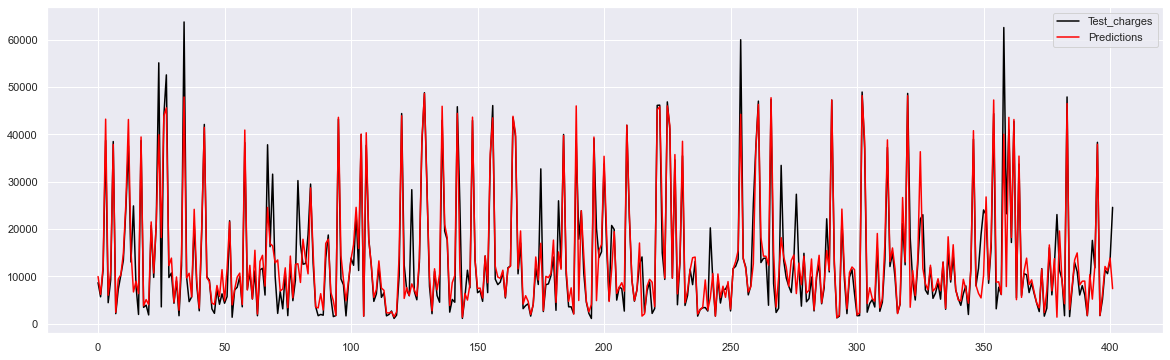

sqrt


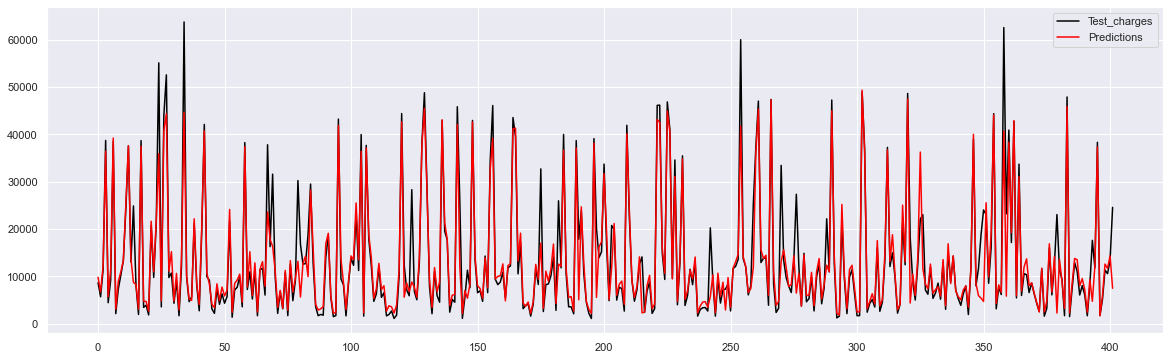

In [47]:
def pred_plot():
    predict={'num':y_pred,'sqrt':y_pred_sqrt}
    for key , value in predict.items():
        print(key)
        plt.figure(figsize=(20,6))
        plt.plot(np.arange(len(y_test)), y_test, color='black', label='Test_charges')
        plt.plot(np.arange(len(value)), value, color='red' ,label='Predictions')
        plt.legend()
        plt.show()
pred_plot()

# Models summary:

In [48]:
def model_summary(y_test,y_pred,title="Title"): 
    max = 55000
    sns.set(rc={'figure.figsize':(13,10)})
    plt.xlim(0,70000)
    plt.ylim(0,max)
    plt.scatter(y_test,y_pred)
    plt.yticks(rotation="90")
    plt.xlabel("test values")
    plt.ylabel("prediceted values")
    plt.plot([0,max],[0,max],'r--')
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    plt.title(str(title).upper(), font={'size':16})
    t1, t2, t3, t4 = "Mean:", "RMSE:", "MAE:", "R^2:"
    s1, s2, s3, s4 = format(y_pred.mean(),'.3f'), format(rmse,'.3f'), format(mae,'.3f'), format(r2,'.3f')
    plt.annotate(f"{t1} {s1:>10} \n{t2} {s2:>10} \n{t3} {s3:>11} \n{t4} {s4:>11}", [2500,max*.87], 
                    font={'size':13, 'family':'courier new', 'weight':'bold'}, 
                    bbox={'facecolor': 'white', 'edgecolor' : 'black', 'alpha': 0.5, 'pad': 10})



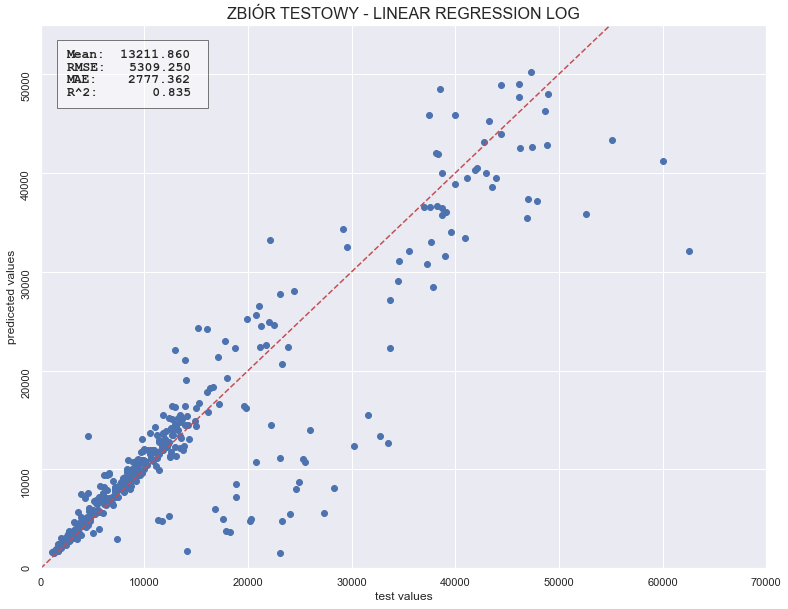

In [49]:
model_summary(10**y_test_l,y_, title='Zbiór testowy - linear regression log')

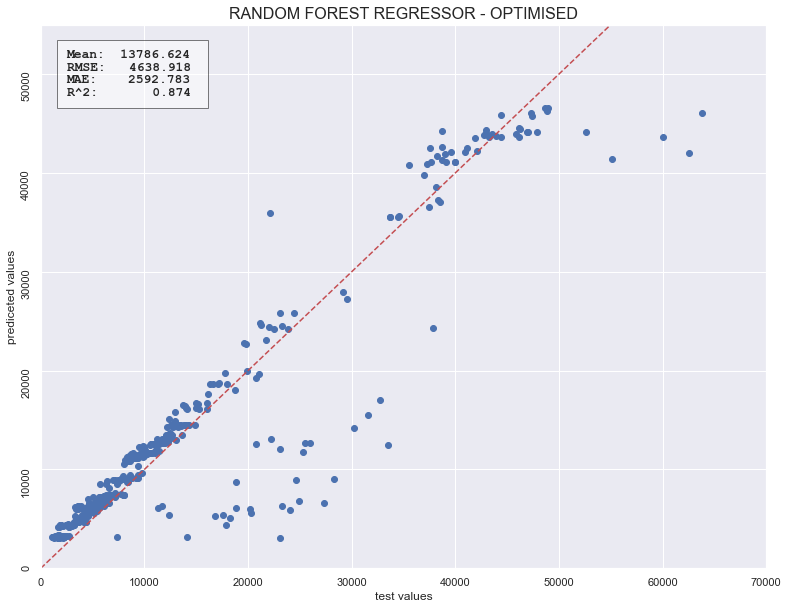

In [50]:
model_summary(y_test,rf_y_pred, "Random Forest Regressor - optimised")

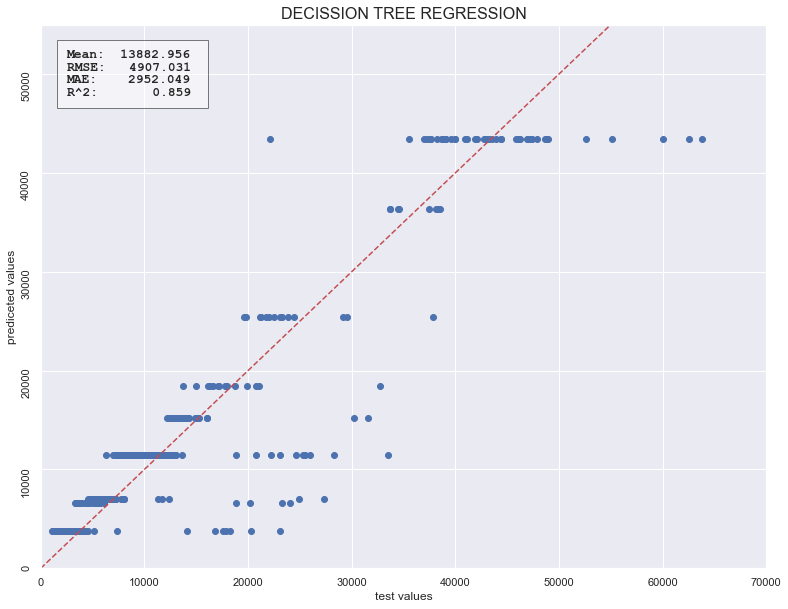

In [51]:
model_summary(y_test,tree_pred, "Decission Tree Regression")

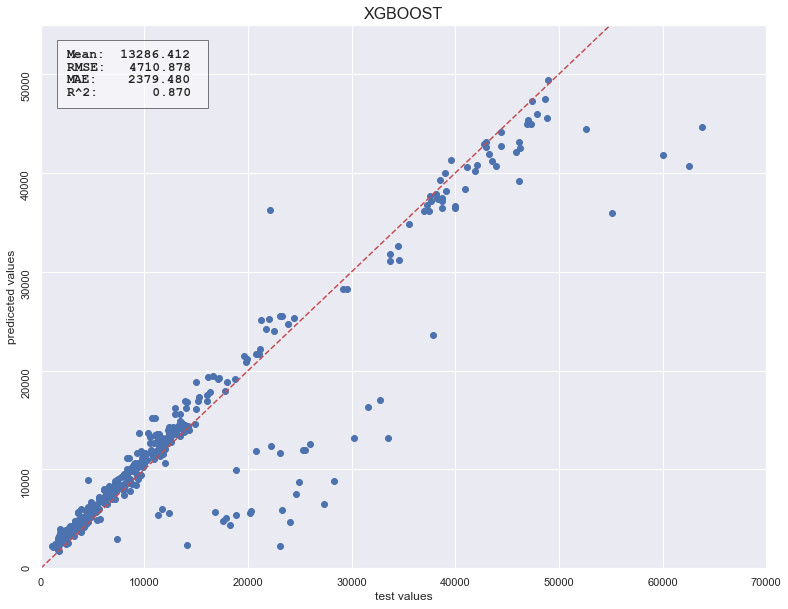

In [52]:
model_summary(y_test,y_pred_sqrt, "XGBoost")

In [58]:
def feature_importance_barplot(x, feature_importance, type_of_ML):
    labels = list(x.columns)
    loc = range(0,len(labels),1)
    importance_prc = feature_importance*100
    sns.set(rc={'figure.figsize':(10,7)}) 
    ax = plt.bar([x for x in loc], importance_prc, color=cm.Blues_r(1-((66+importance_prc)/100)))
    plt.xticks(ticks=list(loc),labels=labels,rotation="45")
    plt.bar_label(ax, labels=importance_prc.round(2), padding=5)
    plt.ylabel("importance [%]")
    plt.yticks(rotation="90")
    plt.title((str(type_of_ML)+" - feature importance").upper())
    plt.show();

In [55]:
rf_importance = rf.feature_importances_
for i,v in enumerate(rf_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.14434
Feature: 1, Score: 0.00742
Feature: 2, Score: 0.20989
Feature: 3, Score: 0.02214
Feature: 4, Score: 0.60011
Feature: 5, Score: 0.00519
Feature: 6, Score: 0.00658
Feature: 7, Score: 0.00434


In [56]:
importance = tree_reg.feature_importances_
plt.figure(figsize=(20,6))
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.11752
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.17022
Feature: 3, Score: 0.00790
Feature: 4, Score: 0.70436
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000


<Figure size 1440x432 with 0 Axes>

In [57]:
feature_importance_barplot(x, rf_importance, "random forest")

NameError: name 'cm' is not defined

In [ ]:
feature_importance_barplot(x, importance, "decission tree regression")

# Data for discount evaluation

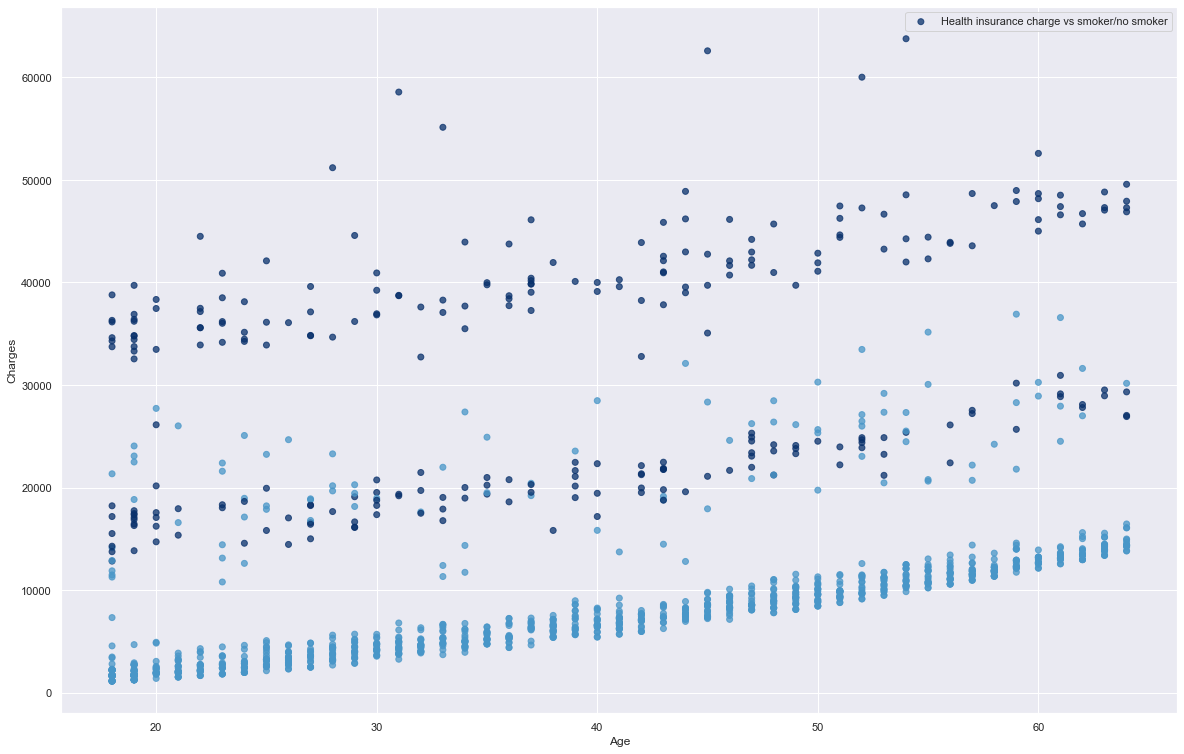

In [59]:
from matplotlib import cm

plt.figure(figsize=(20,13))
sc = plt.scatter(file["age"], file["charges"], color=cm.Blues_r(100-file["smoker_yes"]*100),alpha=.75)
plt.legend(["Health insurance charge vs smoker/no smoker"])
plt.xlabel("Age")
plt.ylabel("Charges");